# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

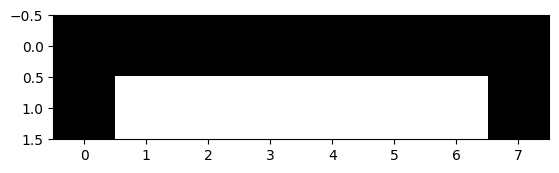

In [87]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1


$$
U(x) = \sum_{c \in \mathcal{C}} V_c(x) \newline
\forall c \in \mathcal{C} \space \Gamma_c = \{(s_1,s_2) \in c ,x_{s_1} \neq x_{s_2} \}, \space \Lambda_c = \{(s_1,s_2) \in c ,x_{s_1} = x_{s_2} \} \newline
Alors, \space U(x) = \sum_{c \in \mathcal{C}} card(\Gamma_c)*\beta
$$
For imaU, the global energy is equal to $8\beta$.


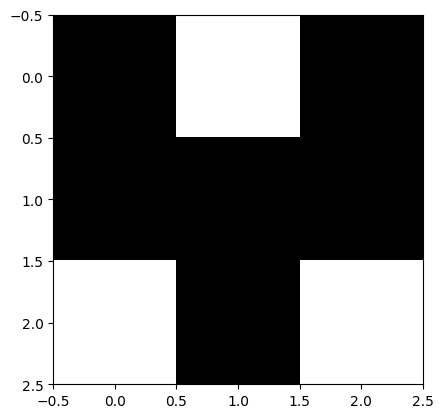

In [93]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2


$$ U(x_s = 0,V_s = (0,1,0,0,0,1,0,1)) = 3\beta \newline
U(x_s = 1,V_s = (0,1,0,0,0,1,0,1)) = 5\beta \newline
\mathbb{P}(X_s = 0 | V_s) = \frac {e^{-3\beta}} {e^{-5\beta} + e^{-3\beta}} \newline
\mathbb{P}(X_s = 1 | V_s) = \frac {e^{-5\beta}} {e^{-5\beta} + e^{-3\beta}} 
$$ 
Exponential being an increasing function, the most probable class is 0.

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



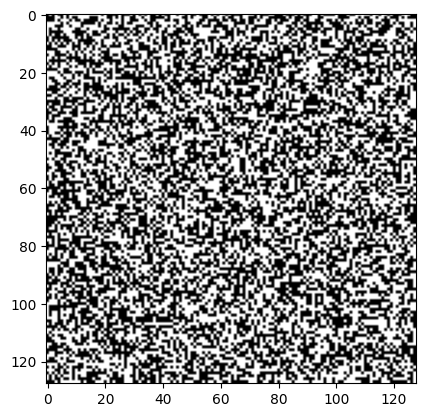

In [94]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [140]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= (im_bin[i1,j])*beta_reg +(im_bin[i2,j])*beta_reg +(im_bin[i,j1])*beta_reg +(im_bin[i,j2])*beta_reg 
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= (im_bin[i1,j]+1)%2*beta_reg +(im_bin[i2,j]+1)%2*beta_reg +(im_bin[i,j1]+1)%2*beta_reg +(im_bin[i,j2]+1)%2*beta_reg 
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

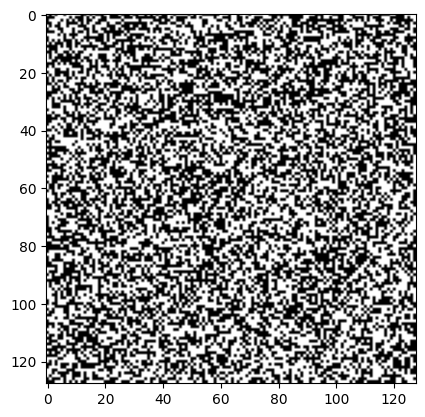

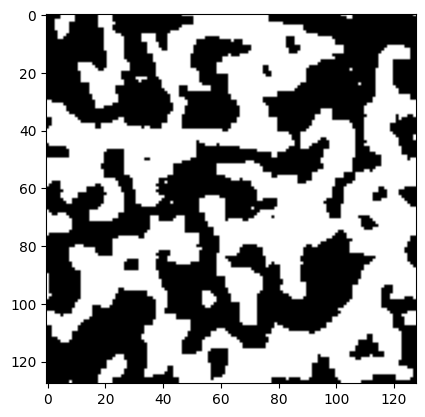

In [123]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=2

# mafigure=plt.figure()
# plt.imshow(im_bin);
# mafigure.canvas.draw()
# plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    # plt.imshow(im_bin)
    # mafigure.canvas.draw()
    # plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3 I don't get the same image, which is normal considering that there are probabilities invovled, therefore even by starting with the same image, every time we update a particular pixel we aren't sure of the value after the update beforehand.

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

#A4

<Figure size 640x480 with 0 Axes>

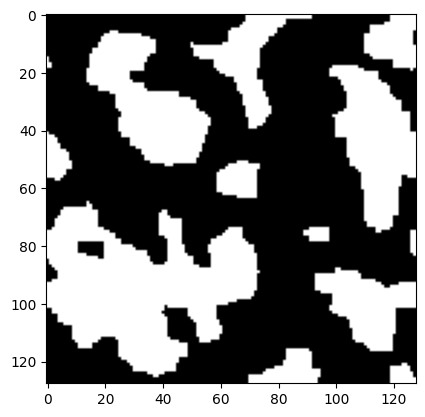

In [129]:
for j in range(40):
    
    # random initialization of im_bin
    plt.set_cmap('gray')
    sh=[128,128]
    im_bin=2-np.ceil(2*np.random.rand(*sh))
    # plt.imshow(im_bin)

    beta_reg=j/2
    print(beta_reg)

    # mafigure=plt.figure()
    # plt.imshow(im_bin);
    # mafigure.canvas.draw()
    # plt.show()

    for n in range(30):
        echan(im_bin,beta_reg)
        # plt.imshow(im_bin)
        # mafigure.canvas.draw()
        # plt.show(block=False)


    plt.figure()
    plt.imshow(im_bin)
    plt.show()

After $\beta = 2.5$, the image stays relatively the same and there are no more random pixels that are alone. $\beta$ is linked to the length of separations between regions of uniformity.

#Q5
Which image minimizes the overall energy for this model?

#A5 An image full of 0 or an image full of 1 would both have energies of 0. There are the only images in which for every pixels, the relations are verified for all cliques.

#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

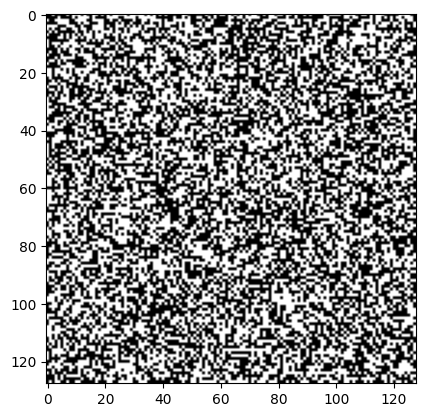

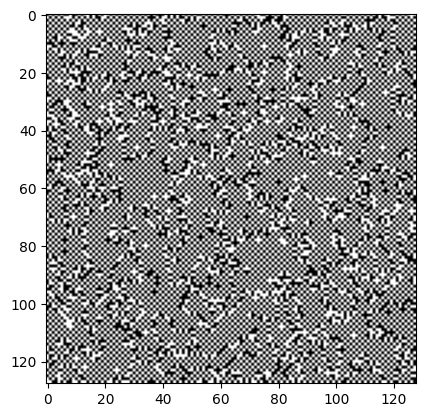

In [141]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=-1

# mafigure=plt.figure()
# plt.imshow(im_bin);
# mafigure.canvas.draw()
# plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    # plt.imshow(im_bin)
    # mafigure.canvas.draw()
    # plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

We get checkboards, if with $\beta > 0$, $\mathbb{P}_0 > \mathbb{P}_1$, then with $\beta_2 $, $\mathbb{P}_0 > \mathbb{P}_1$, therefore, the relation is inverted, we do not prioritize similarity between neighboring pixels but we prioritize dissimilarity.

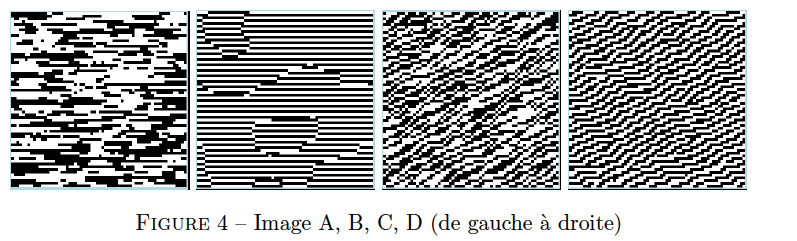

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7 
* Image 1 : horizontal relation $V_c(0,0) = V_c(1,1) = -1$
* Image 2 : vertical relation $V_c(0,0) = V_c(1,1) = 1$
* Image 3 : diagonal relation $\pi$/4 $V_c(0,0) = V_c(1,1) = -1$
* Image 3 : diagonal relation 3 $\pi$/4 $V_c(0,0) = V_c(1,1) = 1$

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

#A8

In [133]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= (im_bin[i1,j1])*beta_reg +(im_bin[i2,j2])*beta_reg +(im_bin[i2,j1])*beta_reg +(im_bin[i1,j2])*beta_reg 
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= (im_bin[i1,j1]+1)%2*beta_reg +(im_bin[i2,j2]+1)%2*beta_reg +(im_bin[i2,j1]+1)%2*beta_reg +(im_bin[i1,j2]+1)%2*beta_reg 
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

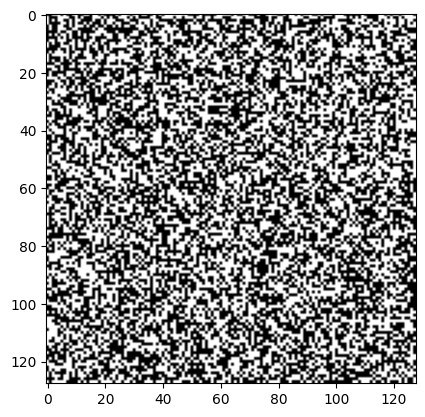

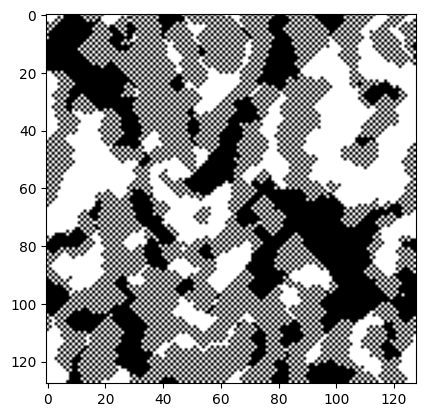

In [134]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=2

# mafigure=plt.figure()
# plt.imshow(im_bin);
# mafigure.canvas.draw()
# plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    # plt.imshow(im_bin)
    # mafigure.canvas.draw()
    # plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

The results makes sense, there are 2 different zones, the uniform one and the checkboard one. Both minimize the energy because in both cases, the relation is always verified.